# Parameters Test

The purpose of this test is to understand which parameter ranges distinguish between the regime in which mutations are not overlapping (thus easily distinguishable) and the regime in which they are overlapping (reconstruction is required).

In [1]:
import sys
sys.path.insert(1, '../code') 
from Parameters import *
from Simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np

## First Test: average number of events for each duplication

Here for semplicity we set: 
- distribution of the number of events = Poisson distribution;
- distribution of the Rearrangement length = truncated uniform distribution;
- all the events (Rearrangements/Mutations) are equiprobable:

The planned simulation should reach $O(10^6)$ cells at the end of the last generation (which would be the 20th). Unfortunately, my laptop does not reach the computing power and memory required to simulate 20 generations. \
To overcome the problem, we will simulate only 5 generations ($\frac{1}{4}$ of the total). Assuming that for each duplication each cell undergoes an average number of events, we expect that the average number of events that will give the same result but in 20 generations will be $\frac{1}{4}$ of that found.

In [2]:
number_of_generations = 5

In [4]:
n_tot = 20
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
          n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib)
     simul.run_visualization(simul.parent, number_of_generations)
     ave, stdv = simul.stat_cumulated_mutations()
     max_ave, max_stdv = simul.stat_max_cumulated_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.30078125, standard deviation: 0.45859774274241416
max average: 1.0, max standard deviation: 0.0

Number of events: 2
average: 0.517578125, standard deviation: 0.518866321436923
max average: 2.0, max standard deviation: 0.0

Number of events: 3
average: 0.62890625, standard deviation: 0.540348895354601
max average: 1.9375, max standard deviation: 0.24206145913796356

Number of events: 4
average: 0.8359375, standard deviation: 0.4289766847903858
max average: 1.78125, max standard deviation: 0.41339864235384227

Number of events: 5
average: 0.849609375, standard deviation: 0.4494352399535548
max average: 1.875, max standard deviation: 0.33071891388307384

Number of events: 6
average: 0.982421875, standard deviation: 0.42583052323839393
max average: 3.0, max standard deviation: 0.0

Number of events: 7
average: 1.01171875, standard deviation: 0.4283181304

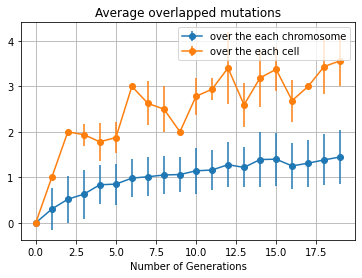

In [5]:
fig, ax = plt.subplots() 
ax.set_title("Average overlapped mutations")
ax.set_xlabel("Number of Generations")
ax.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o', label='over the each chromosome')
ax.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], marker='o', label='over the each cell')
ax.legend()
ax.grid(True)

Test with halved number of generations

In [ ]:
number_of_generations = 5

In [ ]:
n_tot = 10
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib, visual = True)
     simul.run_visualization(simul.parent, number_of_generations)
     ave, stdv = simul.stat_cumulated_mutations()
     max_ave, max_stdv = simul.stat_max_cumulated_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.197265625, standard deviation: 0.39793454008587814
max average: 1.0, max standard deviation: 0.0

Number of events: 2
average: 0.478515625, standard deviation: 0.5034328869182658
max average: 1.125, max standard deviation: 0.33071891388307384

Number of events: 3
average: 0.564453125, standard deviation: 0.4997519831653841
max average: 1.0625, max standard deviation: 0.24206145913796356

Number of events: 4
average: 0.833984375, standard deviation: 0.4304990560452594
max average: 1.9375, max standard deviation: 0.24206145913796356

Number of events: 5
average: 0.873046875, standard deviation: 0.4116184872582066
max average: 1.875, max standard deviation: 0.33071891388307384

Number of events: 6
average: 0.984375, standard deviation: 0.4716058835245803
max average: 2.625, max standard deviation: 0.5448623679425842

Number of events: 7
average: 0.970703

KeyboardInterrupt: 

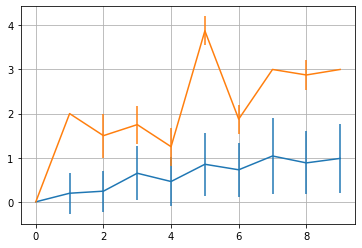

In [ ]:
plt.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o')
plt.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], marker='o')
plt.grid(True)

In [ ]:
np.sqrt(2)

1.4142135623730951